In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad 

In [2]:
# DLPFC
sample = '151507'
input_dir = 'G:/dataset/1_DLPFC/input/'
adata = sc.read_h5ad(input_dir+sample+'.h5ad')
print(adata)


AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [9]:
adata.obs['ground.truth'].value_counts()

Layer 3    1215
Layer 1     817
Layer 5     675
Layer 6     486
Layer 4     369
WM          354
Layer 2     305
na            5
Name: ground.truth, dtype: int64

In [3]:
mat = adata.X.todense()

In [4]:
adata_batch1 = adata.copy()
adata_batch1.X = mat + 1
adata_batch1.obs['batch'] = ['test1' for i in range(adata_batch1.shape[0])]
adata_batch1

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
import random
ids = set()
for i in range(3000):
    number = random.randint(0,adata.shape[1]-1)
    ids.add(number)
    
mat2 = mat.T
for i in ids:
    mat2[i,] = mat2[i,] + 1

adata_batch2 = adata.copy()
adata_batch2.X = mat2.T
adata_batch2.obs['batch'] = ['test2' for i in range(adata_batch2.shape[0])]
adata_batch2

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
adata_integrated = ad.concat([adata, adata_batch1, adata_batch2], index_unique="-", keys = ['origin', 'test1', 'test2'])
adata_integrated

AnnData object with n_obs × n_vars = 12678 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    obsm: 'spatial'

In [7]:
sc.pp.neighbors(adata_integrated)
sc.tl.umap(adata_integrated)
sc.tl.tsne(adata_integrated)
adata_integrated

         Falling back to preprocessing with `sc.pp.pca` and default params.


AnnData object with n_obs × n_vars = 12678 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    uns: 'neighbors', 'umap', 'tsne'
    obsm: 'spatial', 'X_pca', 'X_umap', 'X_tsne'
    obsp: 'distances', 'connectivities'

D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ground.truth'}, xlabel='UMAP1', ylabel='UMAP2'>]

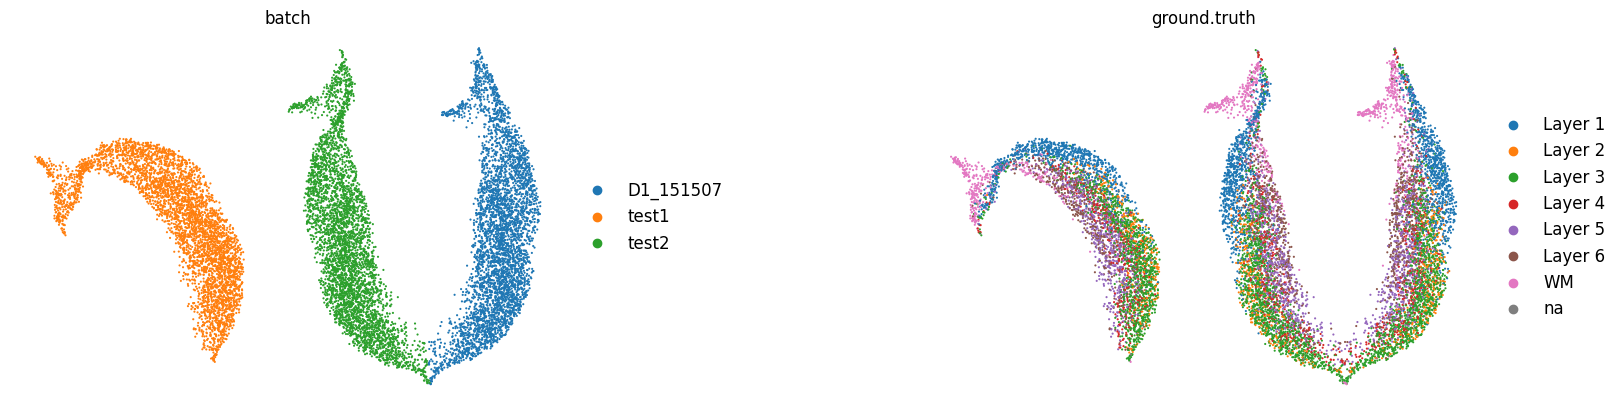

In [8]:
sc.pl.umap(adata_integrated, color=['batch', 'ground.truth'], ncols=2, wspace=0.5, 
           show=False, legend_fontsize=12, legend_fontoutline=2, frameon=False)

In [ ]:
sc